# Bollinger Bands Example

This example shows up how to use `stock-pandas` and mplfinance to draw a candlestick chart 
- with bollinger bands
- And if the stock price of a certain day crosses up the upper bollinger band or crosses down the lower band, we want to draw a marker to emphasize the price.

In the [example](https://github.com/kaelzhang/stock-pandas/tree/master/example) directory, there is a csv file which contains klines of `HK.00700` (TENCENT HOLDINGS LTD) from Oct 15, 2019 to March 9, 2020.

In [2]:
import pandas as pd
from stock_pandas import StockDataFrame

## StockDataFrame(data, date_column=None, *args, **kwargs)

`StockDataFrame` accepts all arguments available for `pandas.DataFrame`.

Besides, we could specify the optional argument `date_column`, and `StockDataFrame` will convert the `dtype` of the column named `date_column` to `datetime`, then set the column as index.

Setting the index of a data frame as `DatetimeIndex` is required by many plotting libraries.

In [3]:
stock = StockDataFrame(
    # Use pandas IO tools to read the csv
    pd.read_csv('tencent.csv'), 
    date_col='time_key'
)

stock

open  close   high    low    volume      turnover  pe_ratio  \
time_key                                                                   
2019-10-15  329.4  328.8  331.6  327.6  14202519  4.679499e+09    34.595   
2019-10-16  330.0  331.0  332.0  328.0  13953191  4.604689e+09    34.827   
2019-10-17  332.8  331.0  332.8  328.4  10339120  3.422302e+09    34.827   
2019-10-18  332.0  331.0  334.2  330.2   9904468  3.288990e+09    34.827   
2019-10-21  329.6  324.8  330.2  324.8  13947162  4.557080e+09    33.571   
...           ...    ...    ...    ...       ...           ...       ...   
2020-03-03  393.0  394.0  398.8  393.0  21808968  8.631162e+09    40.723   
2020-03-04  396.0  394.0  396.0  390.8  19557990  7.691008e+09    40.723   
2020-03-05  398.0  406.2  406.8  394.0  27046138  1.087124e+10    41.984   
2020-03-06  398.0  395.8  400.2  395.0  30386573  1.205159e+10    40.909   
2020-03-09  380.0  383.4  384.6  373.6  16232306  6.175187e+09    39.627   

            turnover_rate  last_close  
time_key                               
2019-10-15        0.00149       328.2  
2019-10-16        0.00146       328.8  
2019-10-17        0.00108       331.0  
2019-10-18        0.00104       331.0  
2019-10-21        0.00146       331.0  
...                   ...         ...  
2020-03-03        0.00228       389.6  
2020-03-04        0.00205       394.0  
2020-03-05        0.00283       394.0  
2020-03-06        0.00318       406.2  
2020-03-09        0.00170         0.0  

[100 rows x 9 columns]

In [4]:
import mplfinance as mpf
import numpy as np

`mplfinance` requires some columns with capitalized names. 

We could use `stock.alias()` to create an alias name for column `"open"` without duplicating it. 

In [5]:
stock.alias('Open', 'open')
stock.alias('High', 'high')
stock.alias('Low', 'low')
stock.alias('Close', 'close')

In [6]:
cross_up_upper = stock['high'].copy()

# `cross_up_upper` is the series of high prices each of which cross up the upper bollinger band.
cross_up_upper[
    ~ stock['column:high > boll.upper']
] = np.nan
# Set some items of the series to `np.nan` so that mplfinance will not draw markers for those items.

cross_down_lower = stock['low'].copy()

cross_down_lower[
    ~ stock['column:low < boll.lower']
] = np.nan

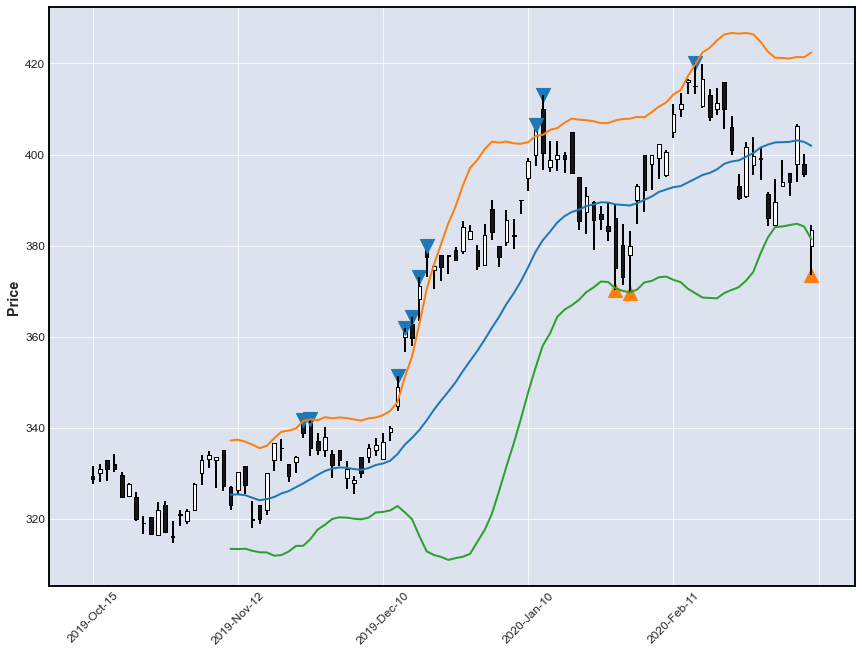

In [7]:
apds = [
    mpf.make_addplot(
        stock[
            [
                # The middle band
                'boll', 
                
                # The upper band
                # The default period of bollinger bands is 20 days. 
                # However, we could specify arguments for a command after `:`.
                'boll.upper:20',
                
                # The lower band
                # Which is a short cut for 'boll.lower'
                'boll.l'
            ]
        ]
    ),
    mpf.make_addplot(cross_up_upper, scatter=True, markersize=200, marker='v'),
    mpf.make_addplot(cross_down_lower, scatter=True, markersize=200, marker='^'),
]

# Go plotting! Oh yeah!
mpf.plot(stock, type='candle', addplot=apds, figscale=2)